In [12]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

import numpy as np

import socket

%config InlinBackend.figure_format = 'svg'

In [13]:
def recvall(sock, count):
    # ¹ÙÀÌÆ® ¹®ÀÚ¿­
    buf = b''
    while count:
        newbuf = sock.recv(count)
        if not newbuf: return None
        buf += newbuf
        count -= len(newbuf)
    return buf

HOST='127.0.0.1'
PORT=8486

In [14]:
options = {
    'model' : 'cfg/yolo-obj.cfg',
    'load' : 'bin/yolo-obj.weights',
    'threshod' : 0.1,
    'gpu' : 1.0
}

tfnet = TFNet(options)


s=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
print('Socket created')

s.bind((HOST,PORT))
print('Socket bind complete')

Parsing ./cfg/yolo-obj.cfg
Parsing cfg/yolo-obj.cfg
Loading bin/yolo-obj.weights ...
Successfully identified 268242956 bytes
Finished in 0.016749143600463867s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      

In [24]:
s.listen(10)
print('Socket now listening')

Socket now listening


In [29]:
conn,addr=s.accept()

/home/ryotta205/anaconda3/envs/YOLOdark/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


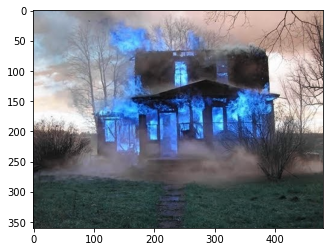

In [30]:
length = recvall(conn, 16)
stringData = recvall(conn, int(length))
data = np.fromstring(stringData, dtype = 'uint8')

frame = cv2.imdecode(data, cv2.IMREAD_COLOR)
plt.imshow(frame)

[{'label': 'fire', 'confidence': 0.8725034, 'topleft': {'x': 227, 'y': 85}, 'bottomright': {'x': 264, 'y': 126}}, {'label': 'fire', 'confidence': 0.6454125, 'topleft': {'x': 299, 'y': 89}, 'bottomright': {'x': 328, 'y': 117}}, {'label': 'fire', 'confidence': 0.8259554, 'topleft': {'x': 310, 'y': 133}, 'bottomright': {'x': 398, 'y': 206}}]


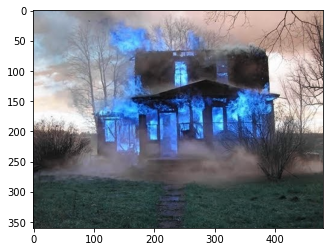

In [31]:
#img = cv2.imread('fire.jpg', cv2.IMREAD_COLOR)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = frame
#img = cv2.imread("test.jpg")
results = tfnet.return_predict(img)
print(results)

img.shape
plt.imshow(img)

{'label': 'fire', 'confidence': 0.8725034, 'topleft': {'x': 227, 'y': 85}, 'bottomright': {'x': 264, 'y': 126}}
{'label': 'fire', 'confidence': 0.6454125, 'topleft': {'x': 299, 'y': 89}, 'bottomright': {'x': 328, 'y': 117}}
{'label': 'fire', 'confidence': 0.8259554, 'topleft': {'x': 310, 'y': 133}, 'bottomright': {'x': 398, 'y': 206}}


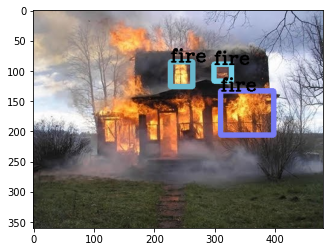

In [32]:
colors = [tuple(255*np.random.rand(3)) for _ in range(10)]
for color, result in zip(colors, results):
    if result['confidence'] >= 0.1 : 
        t1 = (result['topleft']['x'], result['topleft']['y'])
        br = (result['bottomright']['x'], result['bottomright']['y'])
        label = result['label']
        print(result)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.rectangle(img, t1, br, color, 7)
    img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
    
plt.imshow(img)
#plt.show()